In [39]:
import matplotlib.pyplot as plt 
import pandas as pd 

In [40]:
df = pd.read_csv('../data/smhi_wind_data_gbg.csv', sep=';', usecols=[0, 1, 2, 3, 4, 5], header=12)

In [41]:
df

,Datum,Tid (UTC),Vindriktning,Kvalitet,Vindhastighet,Kvalitet.1
0,1961-01-01,06:00:00,180.0,G,0.0,G
1,1961-01-01,12:00:00,180.0,G,4.0,G
2,1961-01-01,18:00:00,140.0,G,3.0,G
3,1961-01-02,06:00:00,180.0,G,4.0,G
4,1961-01-02,12:00:00,180.0,G,5.0,G
...,...,...,...,...,...,...
305146,2023-07-01,02:00:00,249.0,G,3.1,G
305147,2023-07-01,03:00:00,226.0,G,2.2,G
305148,2023-07-01,04:00:00,223.0,G,2.3,G
305149,2023-07-01,05:00:00,217.0,G,1.9,G


In [42]:
df['Datum'] = pd.to_datetime(df['Datum'])
df['Year'] = pd.to_datetime(df['Datum']).dt.year



In [43]:
df['Vindhastighet'] = pd.to_numeric(df['Vindhastighet'], errors='coerce')

# Group the DataFrame by 'year' and 'Datum' and calculate the mean wind speed for each day
average_wind_speed_per_day = df.groupby(['Year', 'Datum'])['Vindhastighet'].mean()
average_wind_speed_per_day = pd.DataFrame(average_wind_speed_per_day)

In [44]:
average_wind_speed_per_day

Vindhastighet
Year Datum                    
1961 1961-01-01       2.333333
     1961-01-02       5.000000
     1961-01-03       8.666667
     1961-01-04       5.333333
     1961-01-05       2.666667
...                        ...
2023 2023-06-27       2.541667
     2023-06-28       2.004167
     2023-06-29       2.250000
     2023-06-30       4.925000
     2023-07-01       2.471429

[19629 rows x 1 columns]

In [45]:
days_per_year = average_wind_speed_per_day.groupby('Year').count()
# print(days_per_year)
years_with_less_than_365_days = days_per_year[days_per_year < 365]

# Print the years with fewer than 365 days of observations
print(years_with_less_than_365_days)

      Vindhastighet
Year               
1961            NaN
1962            NaN
1963            NaN
1964            NaN
1965            NaN
1966            NaN
1967            NaN
1968            NaN
1969          304.0
1970            NaN
1971            NaN
1972          275.0
1973            NaN
1974            NaN
1975            NaN
1976          274.0
1983          276.0
1984            NaN
1985          356.0
1986          355.0
1987            NaN
1988            NaN
1989          351.0
1990            NaN
1991            NaN
1992            NaN
1993            NaN
1994          362.0
1995          350.0
1996          343.0
1997          363.0
1998          135.0
1999          284.0
2000            NaN
2001          362.0
2002            NaN
2003          362.0
2004            NaN
2005          359.0
2006            NaN
2007            NaN
2008            NaN
2009            NaN
2010            NaN
2011          355.0
2012            NaN
2013          324.0
2014          178.0


In [46]:
df

,Datum,Tid (UTC),Vindriktning,Kvalitet,Vindhastighet,Kvalitet.1,Year
0,1961-01-01,06:00:00,180.0,G,0.0,G,1961
1,1961-01-01,12:00:00,180.0,G,4.0,G,1961
2,1961-01-01,18:00:00,140.0,G,3.0,G,1961
3,1961-01-02,06:00:00,180.0,G,4.0,G,1961
4,1961-01-02,12:00:00,180.0,G,5.0,G,1961
...,...,...,...,...,...,...,...
305146,2023-07-01,02:00:00,249.0,G,3.1,G,2023
305147,2023-07-01,03:00:00,226.0,G,2.2,G,2023
305148,2023-07-01,04:00:00,223.0,G,2.3,G,2023
305149,2023-07-01,05:00:00,217.0,G,1.9,G,2023


In [47]:
days_per_year = df.groupby('Year')['Datum'].nunique()

# Filter for years with fewer than 365 unique dates
years_with_less_than_365_days = days_per_year[days_per_year < 365]

# Count how many years meet the criteria
count_of_years = len(years_with_less_than_365_days)

# Print the count of years with less than 365 unique dates
print(count_of_years)

22


In [48]:
yearly_counts = df.groupby('Year').size()

# Filter for years with fewer than 365 observations
years_with_less_than_365_observations = yearly_counts[yearly_counts < 365]

# Count how many years meet the criteria
count_of_years = len(years_with_less_than_365_observations)

# Print the count of years with less than 365 observations
print(count_of_years)

0


In [49]:
# check for missing values
yearly_day_counts = df.groupby('Year')['Datum'].count()

years_with_less_than_365 = yearly_day_counts[yearly_day_counts < 365]

print( years_with_less_than_365.index)

Index([], dtype='int32', name='Year')


In [50]:
# Filter the DataFrame for the year 2023
df_2023 = df[df['Year'] == 2023]

# Count the number of unique dates in the filtered DataFrame
count_of_days_2023 = df_2023['Datum'].nunique()

# Print the count of days for the year 2023
print(count_of_days_2023)


182


In [51]:
df['Snitt_per_dag'] = df.groupby('Datum')['Vindhastighet'].transform('mean').round(2)
df['Max_per_dag'] = df.groupby('Datum')['Vindhastighet'].transform('max').round(2)

Plots

In [52]:
# df.rename(columns={'Year': 'year'}, inplace=True)
df['Datum'] = pd.to_datetime(df['Datum'])
# df_year_wind = df.groupby(df['Datum'].dt.year)['Vindhastighet'].mean()
yearly_wind = df.groupby(df['Datum'].dt.year)['Vindhastighet'].agg(['mean', 'median']).reset_index()

yearly_wind.columns = ['Year', 'Mean Wind Speed', 'Median Wind Speed']



yearly_wind['Year'] = pd.to_datetime(yearly_wind['Year'], format='%Y')
yearly_wind.set_index('Year', inplace=True)

In [53]:
df_2 = pd.read_excel('../data/SCB_årlig_nybyggda lagenheter_göteborg_1975_2023.xlsx')
df_2.rename(columns={'Year': 'year'}, inplace=True)
df_2['year'] = pd.to_datetime(df_2['year'], format='%Y')
df_2.set_index('year', inplace=True)
df_2['total_housing'] = df_2['flerbostadshus'] + df_2['småhus']

In [54]:
# Create a new DataFrame with the desired index
new_index = pd.date_range(start='1975-01-01', end='2022-01-01', freq='AS')
new_df = pd.DataFrame(index=new_index)

# Extract the 'Mean Wind Data' and 'total housing' columns
mean_wind_data = yearly_wind['Mean Wind Speed']
new_housing = df_2['total_housing']

new_df['Mean Wind Data'] = mean_wind_data
new_df['New Housing'] = new_housing

# Create the 'Total Housing' column
new_df['Total Housing'] = new_df['New Housing'].cumsum()


# Fill the first row of 'Total Housing' with the value from the 'New Housing' column
# new_df['Total Housing'].iloc[0] = new_df['New Housing'].iloc[0]

# Convert the 'Total Housing' column to integers (optional)
new_df['Total Housing'] = new_df['Total Housing'].astype(int)



In [55]:
summary_wind = yearly_wind['Mean Wind Speed'].describe()

# Calculate summary statistics for 'Total_Nederbördsmängd' in df2
summary_bygg_data = df_2['total_housing'].describe()

# Combine the summary statistics into a single DataFrame
summary_table = pd.concat([summary_wind, summary_bygg_data], axis=1)
summary_table.columns = ['Mean Wind Data', 'Addtional apartments built this year']

print(summary_table)

       Mean Wind Data  Addtional apartments built this year
count       57.000000                             48.000000
mean         3.671751                           1842.625000
std          0.998781                           1100.511808
min          1.793600                            435.000000
25%          2.758300                           1177.750000
50%          3.627037                           1561.000000
75%          4.380822                           2105.250000
max          5.774429                           5621.000000


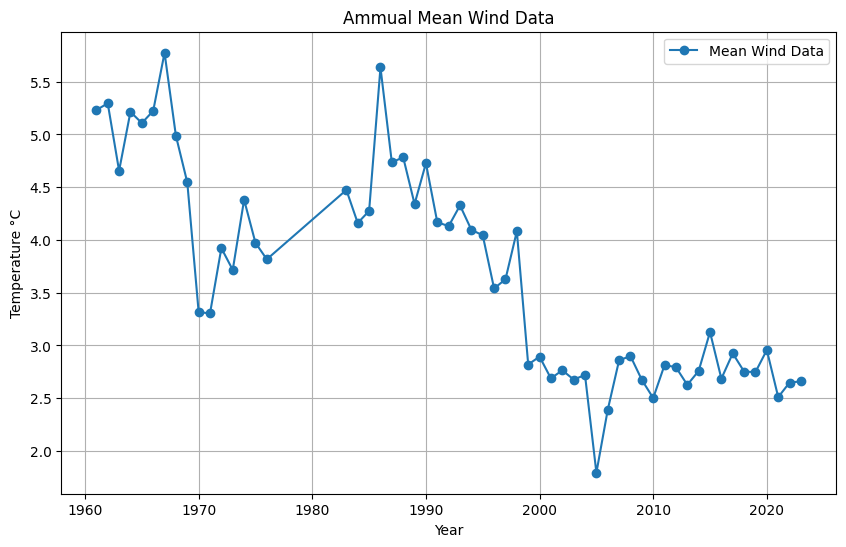

In [56]:
# scatterplot with wind data & total yearly new apartments 
plt.figure(figsize=(10, 6))
plt.plot(yearly_wind.index, yearly_wind['Mean Wind Speed'], label='Mean Wind Data', marker='o')
plt.title('Ammual Mean Wind Data')
plt.xlabel('Year')
plt.ylabel('Temperature °C')
plt.grid(True)
plt.legend()
plt.show()